In [67]:
import pandas as pd          # For data manipulation
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns        # For advanced and beautiful visualizations
import numpy as np           # For numerical computations (optional)


In [40]:
from google.colab import files
uploaded = files.upload()


Saving 311_Service_Requests.csv to 311_Service_Requests (2).csv


In [65]:


data = pd.read_csv('311_Service_Requests.csv')


<ipython-input-65-75bd9342770a>:1: DtypeWarning: Columns (24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('311_Service_Requests.csv')


In [69]:
data.head()


,Created Date,CaseNumber,Department,Division,Type,Status,StatusDescription,Closed Date,PropertyID,ReportedLocation,...,Longitude,Duplicate Request,Council District,PlanningNeighborhood,PlanningSector,PoliceDistrict,Census Tract,Census Block Group,Census Block,Location
0,05/11/2024 20:14:00,983815,National Grid,NaN,Streetlight(s) Issues,Closed,NaN,06/04/2024 06:19:00 PM,NaN,MARYLAND,...,NaN,False,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN
1,05/11/2024 19:47:00,973581,"Public Works, Parks & Streets",Engineering,Sign Issue,New,Public Works Engineering work order pending to...,NaN,NaN,DAISY,...,NaN,False,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN
2,08/20/2024 20:31:00,1048054,National Grid,NaN,Streetlight(s) Issues,Closed,NaN,09/04/2024 01:36:00 PM,77.32-1-36,Tonawanda St,...,-78.90865,False,NaN,Riverside,NORTH,NaN,NaN,NaN,NaN,POINT (-78.90864975 42.959155499999994)
3,05/11/2024 20:14:00,983860,National Grid,NaN,Streetlight(s) Issues,Closed,NaN,06/04/2024 06:19:00 PM,NaN,Washington St,...,NaN,False,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN
4,08/16/2024 20:13:00,1046551,"Public Works, Parks & Streets",Parks and Recreation,Olmsted Parks Issue,Closed,The Olmsted Parks Conservancy has reviewed thi...,08/19/2024 12:45:00 PM,NaN,NaN,...,NaN,False,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN


In [44]:
# Count missing values in each column and sort in descending order
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values)


Secondary Street        34088
Division                13510
Closed Date              5781
PropertyID               3757
StatusDescription        1684
Assessed Number          1497
State                     928
ReportedLocation          602
City                      476
Longitude                 226
Latitude                  226
Location                  226
AssessedStreet            218
Street                    139
Zip                       139
PlanningNeighborhood       66
PlanningSector             66
Council District           55
PoliceDistrict             48
Census Tract               44
Census Block Group         44
Census Block               44
CaseNumber                  0
Status                      0
Type                        0
Department                  0
Duplicate Request           0
Created Date                0
dtype: int64


# **Keep Only the Relevant Columns:**

In [41]:
# Keep only the necessary columns
data = data[['Created Date', 'Closed Date', 'Street', 'Zip', 'Type']]
data.head()


,Created Date,Closed Date,Street,Zip,Type
0,05/11/2024 20:14:00,06/04/2024 06:19:00 PM,MARYLAND,14212.0,Streetlight(s) Issues
1,05/11/2024 19:47:00,NaN,DAISY,14212.0,Sign Issue
2,08/20/2024 20:31:00,09/04/2024 01:36:00 PM,Tonawanda St,NaN,Streetlight(s) Issues
3,05/11/2024 20:14:00,06/04/2024 06:19:00 PM,Washington St,14212.0,Streetlight(s) Issues
4,08/16/2024 20:13:00,08/19/2024 12:45:00 PM,NaN,NaN,Olmsted Parks Issue


# **Check Missing Values**

In [57]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Created Date                0
CaseNumber                  0
Department                  0
Division                13462
Type                        0
Status                      0
StatusDescription        1679
Closed Date                 0
PropertyID               3653
ReportedLocation          450
Assessed Number          1394
AssessedStreet            135
Street                      0
Secondary Street        33924
City                      381
State                     822
Zip                         0
Latitude                  131
Longitude                 131
Duplicate Request           0
Council District           11
PlanningNeighborhood       31
PlanningSector             31
PoliceDistrict             17
Census Tract                0
Census Block Group          0
Census Block                0
Location                  131
dtype: int64


# **Handling Missing Value**

**Replacing missing Closed Date values with 'Unresolved'**

**For Sreet and Zip by dropping missing rows.**

In [50]:
data['Closed Date'] = data['Closed Date'].fillna('Unresolved')


In [51]:
data = data.dropna(subset=['Street', 'Zip'])


In [64]:
print(data.isnull().sum())


Created Date                0
CaseNumber                  0
Department                  0
Division                13462
Type                        0
Status                      0
StatusDescription        1679
Closed Date                 0
PropertyID               3653
ReportedLocation          450
Assessed Number          1394
AssessedStreet            135
Street                      0
Secondary Street        33924
City                      381
State                     822
Zip                         0
Latitude                  131
Longitude                 131
Duplicate Request           0
Council District           11
PlanningNeighborhood       31
PlanningSector             31
PoliceDistrict             17
Census Tract                0
Census Block Group          0
Census Block                0
Location                  131
dtype: int64


# **Top ZIP Codes with Most Issues**

In [60]:
# Count the number of issues per ZIP code
zip_counts = data['Zip'].value_counts()

# Display the top 10 ZIP codes
print(zip_counts.head(10))


Zip
14215.0    5054
14211.0    3716
14213.0    3173
14206.0    3068
14220.0    2864
14214.0    2640
14207.0    2628
14216.0    2519
14210.0    2162
14208.0    1747
Name: count, dtype: int64


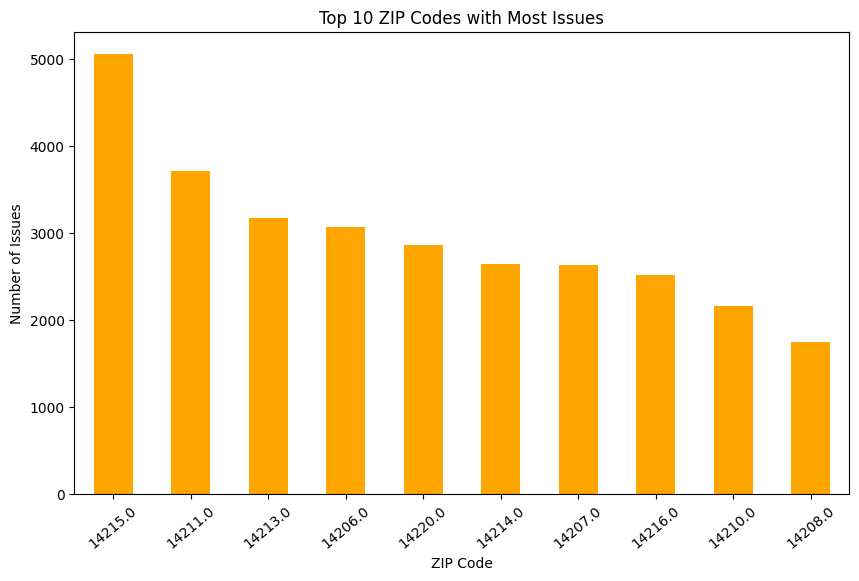

In [70]:
# Plot the top 10 ZIP codes with the most issues
zip_counts.head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 ZIP Codes with Most Issues')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Issues')
plt.xticks(rotation=400)
plt.show()


# **Analyze Top Streets with Most Issues**

In [71]:
# Count the number of issues per street
street_counts = data['Street'].value_counts()

# Display the top 10 streets
print(street_counts.head(10))


Street
Elmwood Ave      238
Bailey Ave       218
Main             212
Niagara St       193
Broadway         193
Amherst St       180
Hertel           176
Mckinley Pkwy    174
Seneca           167
Clinton          164
Name: count, dtype: int64


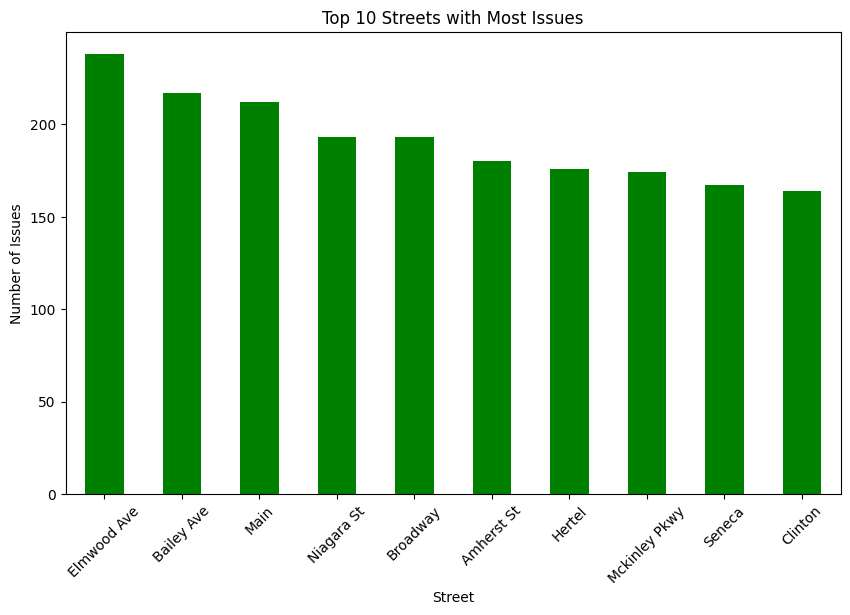

In [63]:
# Plot the top 10 streets with the most issues
street_counts.head(10).plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 10 Streets with Most Issues')
plt.xlabel('Street')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45)
plt.show()


# **Analyze Most Common Issue Types**

In [32]:
# Count the number of each issue type
issue_counts = data['Type'].value_counts()

# Display the most common issue types
print(issue_counts.head(10))


Type
Replacement Garbage Totes Request           3990
Housing or Building Violations(Exterior)    3955
Garbage Missed Pick Up                      2943
High Grass/Weeds                            2405
Streetlight(s) Issues                       1443
Rodent Control Issue                        1312
Sign Issue                                  1145
Trash Ordinance Violation                   1077
Pothole Issue                               1041
Recycling Missed Pick Up                    1005
Name: count, dtype: int64


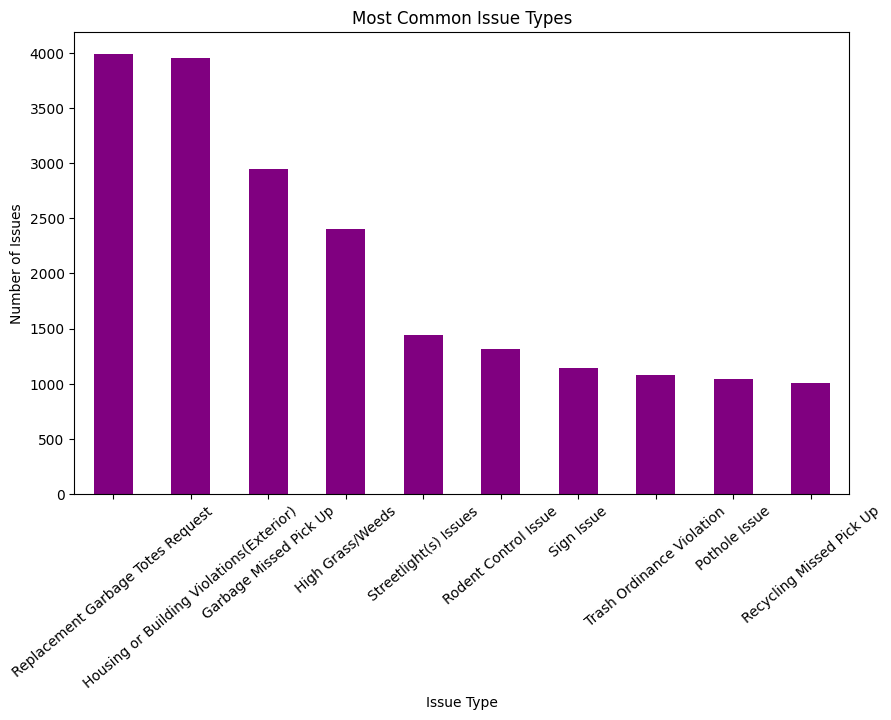

In [68]:
# Plot the most common issue types
issue_counts.head(10).plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Most Common Issue Types')
plt.xlabel('Issue Type')
plt.ylabel('Number of Issues')
plt.xticks(rotation=400)
plt.show()
